**SEGUNDA ENTREGA DE PROYECTO**:

**INTEGRANTES:** 
1. Jaime Andres Macias
2. David Santiago León

**Introducción:**

A lo largo de la historia, el intercambio de información entre dos individuos ha desempeñado un papel  crucial  en  el  desarrollo  del  mismo.  En  la  teoría  de  la  comunicación,  existen  el  emisor,  el receptor y el canal, quienes juegan un rol como elementos básicos para la transmisión de un mensaje.  El  contenido  de  este  mensaje  puede  ser  de  caracter  reservado  o  no.  Durante  el  proceso  dela comunicación, el emisor genera su mensaje y el receptor espera su llegada. Sin embargo, esta información viaja por un canal, el cual, la mayoría de veces, es susceptible a intervención ajena al emisor y el receptor. Dependiendo de su carácter, el acceso a tal información puede significar o no la vulnerabilidad de la privacidad de los agentes y con ello, repercusiones externas y severas.

El campo de las ciencias de la comunicación, trabaja en el constante perfeccionamiento de nuevos métodos de encriptación, en aras de alcanzar la mayor seguridad para el intercambio de información del modo mas eficiente. Existen varios tipos de métodos criptográficos como la criptografía simétrica,  con  umbral  o  basada  en  certificados,  sin  embargo,  en  este  proyecto  se  emprenderá  una  breve introducción encaminada al sistema de encriptación asimétrica o también llamada criptografía de clave pública, especificamente  el algoritmo RSA(Rivest, Shamir y Adleman).

**Criptografía asimétrica o de clave pública:**

Antes de la aparición de la criptografía asimétrica, surgió la criptografía simétrica, la cual solo utiliza
una clave para cifrar y descifrar el mensaje conocido por el emisor y el receptor previamente;
este es el punto débil del sistema, la comunicación de las claves entre ambos sujetos, ciertamente
resulta mas sencillo interceptar una clave que se ha transmitido sin seguridad (diciendola en alto,
mandandola por correo electrónico u ordinario o haciendo una llamada telefónica).

Para darnos una idea, la máquina Enigma (maquina de cifrado electromecánica que generaba abecedarios
segun la posicion de unos rodillos que podran tener distintas ordenes y posiciones) usaba
un metodo simetrico con un algoritmo que dependa de una clave (que mas que clave parece un
ritual) formada por: los rotores o rodillos que usaba, su orden y la posicion de cada anillo, siendo
esto lo mas basico.

La criptografa asimetrica se basa en el uso de dos claves: la publica (que se podra difundir sin
ningun problema a todas las personas que necesiten mandarte algo cifrado) y la privada (que no
debe de ser revelada nunca).
Las principales diferencias entre la criptografa simetrica y asimetrica radican en la seguridad. Por
ejemplo, la primera tiende a ser mas insegura, pues el hecho de pasar la clave representa una gran
vulnerabilidad. Por otro lado, una ventaja de la encriptacion simetrica reside en su tiempo de
cifrado y descifrado, menor al necesario para efectuar la asimetrica; a decir verdad, de estos hechos,
surge la criptografa hbrida, menester para alcanzar un equilibrio entre las dos.

---



**Datos de prueba**: Cadenas de texto


---



**Algoritmo RSA**:

En 1978, se propone en el MIT el algoritmo RSA, este algoritmo se fundamenta en la factorización de un número compuesto(grande)en factores de dos primos, de modo que para su funcionamiento,los usuarios A y B deben seleccionar un número compuesto, cuyos números primos que lo factorizan,deben ser de más de 1024 bits(recomendado  para  mejor  seguridad), por supuesto los valores de p y q son conocidos solamente por los usuarios.

---



**Fundamentos matemáticos**:

La idea fundamental detrás del algoritmo RSA es tratar de construir función trampa o de un solo camino sobre un conjunto X. Esta es una función invertible:
$$E:X\longrightarrow X$$
 tal que $$y=f(x)$$ 
es computacionalmente sencilla de calcular. Y siempre y cuando se conozca un valor secreto $t$, $$x=f^{-1}(x)$$
es computacionalmente sencilla de computar, en otro caso, hallar $x$ es computacionalmente inviable de calcular. Esta complejidad para calcular $x$ (o clave privada) se debe a que el problema de descomposición canónica de un entero en factores primos no es un problema sencillo, este ha sido estudiado ampliamente en teoría de números y se ha llegado a la conclusión de que es un problema **$NP$** en la teoría de complejidad computacional. La utilidad de este método yace sujeta al problema computacional $P vs NP$; en caso de ser resuelto y descubrir su veracidad, decaería su eficiencia. 


---
**Funcionamiento del algoritmo RSA:**

**Generación de claves:**

1. Generar dos primos grandes p y q de tamaño similar. Estos primos deben ser generados de manera aleatoria y deben tener un tamaño parecido.
2. Calcular $n=p\cdot q$ y $\phi =(p-1)\cdot (q-1)$, siendo $\phi$ la función de Euler.
3. Elegir un número entero $e$ tal que $1 < e<\phi$ con $mcd(e,\phi)=1$.
4. Calcular el único entero $d$, tal que $e\cdot d\equiv1(mod\phi)$.
5. La clave pública es $(n,e)$, la privada es $d$.

**Cifrado y descifrado:**

El usuario A cifra un mensaje (m) para B

1. Obtener la clave pública de $A:(n,e)$.
2. Representar el mensaje como un entero $m$ en el intervalo $[ 0 , n-1 ]$.
3. Calcular $c\equiv m^{e}(mod n)$.
4. Enviar el texto cifrado $c$ al usuario $A$.

El usuario B descifra el mensaje de A:
1. Usar la clave privada para recuperar $m\equiv c^{d}(modn)$


**Nota:** No está demostrado que el problema RSA sea equivalente al de la factorización, pero el problema de determinar **$d$** si lo es, ya que conocido este, existen métodos para encontrar la factorización de n.

---

**Algorimo RSA en código:**









In [73]:
#La librería py-Crypto nos es de gran ayuda para el ejercicio

#En caso de que suelte un error que diga que no encuentra el modulo Crypto, ejecutar la siguiente linea de código:

#!apt-get -qq install python-crypto python3-crypto


import Crypto
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import binascii
from time import time

#Función para determinar el tiempo de ejecución 
def count_elapsed_time(f):
  def wrapper():
    # Start counting.
    start_time = time()
    # Take the original function's return value.
    ret = f()
    # Calculate the elapsed time.
    elapsed_time = time() - start_time
    print("Elapsed time: %0.10f seconds." % elapsed_time)
    return ret     
  return wrapper



#La librería cryto nos ayuda a generar las dos claves, teniendo en cuenta los parámetros definidos antes en el notebook
random_generator=Crypto.Random.new().read
#El tamaño de las llaves se define de 1024 bits, como lo recomienda la teoría
private_key=RSA.generate(1024,random_generator)
public_key=private_key.publickey()


def encriptar(m):
  m=m.encode()
  cipher=PKCS1_OAEP.new(public_key)
  encriptado=cipher.encrypt(m)
  return encriptado


def desencriptar(m):
  cipher=PKCS1_OAEP.new(private_key)
  mensaje=cipher.decrypt(m)
  return mensaje

#Recibimos el mensaje
mensaje=input("Ingrese el mensaje que quiere cifrar: ")


#Encriptar
start_time = time()
encriptado=encriptar(mensaje)
elapsed_time = (time() - start_time)*1000
print("Elapsed time in encryption: %.10f miliseconds." % elapsed_time)


print("El mensaje encriptado es: ")
print(encriptado)


start_time = time()
#Desencriptar el mensaje con la clave privada
mensaje=desencriptar(encriptado)
elapsed_time = (time() - start_time)*1000
#print("Elapsed time in decryption: %.10f miliseconds." % elapsed_time)
print("El mensaje desencriptado es: "+str(mensaje))
print("")
print("-----------------------------------------------------------------------------------------------------------------")
print("")


#Experimentos -> se utilizan cadenas de longitud desde 1 a 85

for l in range(1,86):
  msg=""
  print("#######################################################################################")
  print("Cadena de longitud "+str(l))
  for i in range(l):
    msg+='a'
  #Tengo la entrada de longitud l
  #Encriptar
  start_time = time()
  encriptado=encriptar(msg)
  elapsed_time = (time() - start_time)*1000
  print("Tiempo total de encriptación: %.10f miliseconds." % elapsed_time)

  #Desencriptar el mensaje con la clave privada
  start_time = time()
  mensaje=desencriptar(encriptado)
  elapsed_time = (time() - start_time)*1000
  print("Tiempo total de desencriptación: %.10f miliseconds." % elapsed_time)
  print("#######################################################################################")
  print("")


Ingrese el mensaje que quiere cifrar: hola
Elapsed time in encryption: 0.7090568542 miliseconds.
El mensaje encriptado es: 
b"\xad\xe0\xb4\xe1\x96Z\xaa\xda\xa1\xc4\t['\x9d\x93\x93m~\x06\t?\x18\xfa\r\x1f\xcd:rgkKq.\x1f\xc0NW\xc3\xf2\xc50i\xcf\xd0\xc1\x87\xe6\x899\x8fZ,\xb7\x1cg\xf5\x08.\x12G,\xc6\xee\x0b.N\x8c\xa3\x91\xb4fX-\x8b|\x85.2\x10^\xff{k4\xb3\xc2\xfe;\xdc\xa5\x1f\x90K\xbf\x8a\xbcFl\xffOh\x93\xe28\xd1'\xd1s\xd2\xd2Xb/\xba\xb89\xad\x8d0=(\x83j<`Ef\xfd"
El mensaje desencriptado es: b'hola'

-----------------------------------------------------------------------------------------------------------------

#######################################################################################
Cadena de longitud 1
Tiempo total de encriptación: 0.4813671112 miliseconds.
Tiempo total de desencriptación: 0.7791519165 miliseconds.
#######################################################################################

#######################################################################

**Gráficas**:

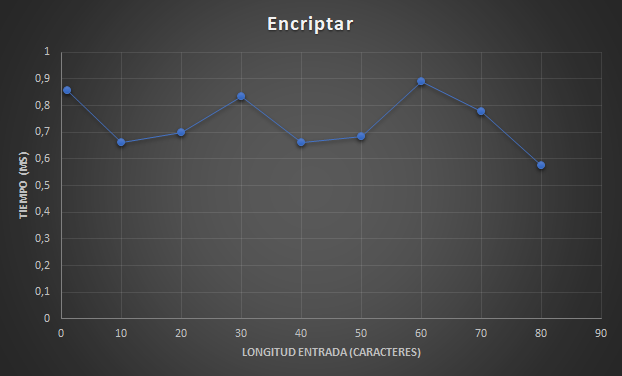


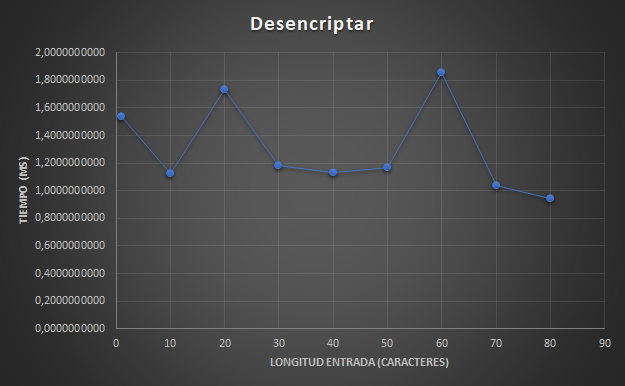

**Conclusiones:**

1. Debido a la naturaleza matemática del método, este resulta muy seguro a la hora de brindar seguridad a los mensajes enviados, ya que a final de cuentas se basa en la solvencia de un problema **NP**, del cual si no se conocen sus datos clave, es **muy difícil de solucionar o inviable computacionalmente**.
2. Como podemos ver el los experimentos realizados, el tiempo de encriptación es menor al de desencriptación, sin embargo estos no varian mucho (menos de un milisegundo)
3. Pese a que el algoritmo RSA es bastante rápido (pocos milisegundos), es lento en comparación a otros métodos de encriptación asimétrica, por ejemplo el Algoritmo de la Mochila (Merkle - Hellman).



**Referencias**:
1. W. Stein. Elementary Number Theory: Primes, Congruences, and Secrets, Springer Verlag, 2017.
2. N. Smart. Cryptography Made Simple, Springer Verlag, 2016. 
3. G. Rubiano. Teora de numeros [para principiantes], Universidad Nacional de Colombia, 2004.